In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import inspect
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tf.random.set_seed(123)

TF version: 2.5.0
TFP version: 0.13.0


In [2]:
# Define a batch of two Univariate Gaussian Distributions

locs = [1,2]
scales = [3,4]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [3]:
# Convert the batch_shape to an event_shape using tfd.Independent

bivariate_normal_from_independent =tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=1)

# parameter1 : Batch of Normal Distributions
# parameter2 : Number of batch_shape dimensions to convert to event_shape, starting from right to left

# Notice batch_shape [2], event_shape [] now became batch_shape[], event_shape[2]
bivariate_normal_from_independent



<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

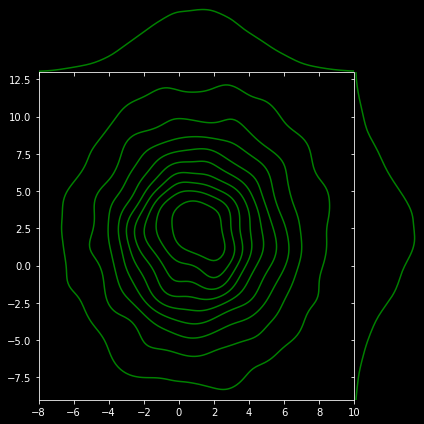

In [4]:
# 1000 samples from Independent Bivariate Distribution
samples = bivariate_normal_from_independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]

# Joint density contours and marginal density functions
sns.jointplot(x = x1, y = x2, kind="kde", space=0, color='g', xlim=[-8, 10], ylim=[-9, 13])

In [5]:
# tfd.MultivariateNormalDiag performs exactly the same as tfd.Independent with two normal distributions.

# Note that scale_diag parameter was scales = [3,4]
# which is equivalent to,
# [[3, 0]
#  [0, 4]] 

# Diagonal covariance matrix has no correlation with each other, hence independent.

bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc = locs, scale_diag = scales)

bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

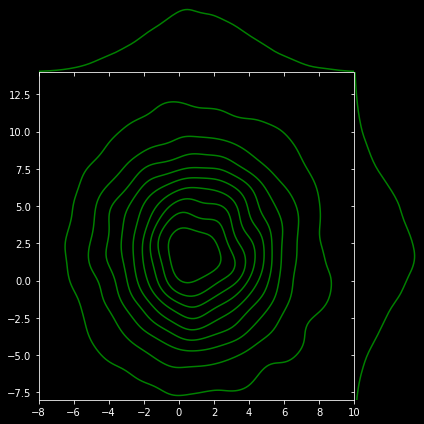

In [6]:
# Plot the joint density function of bivariate_normal_from_Multivariate.
# Compare it with bivariate_normal_from_independent.

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x=x1, y=x2, kind="kde", space=0,
              color='g', xlim=[-8, 10], ylim=[-8, 14])


In [15]:
# Explanation of reinterpreted_batch_ndims parameter
# Define Normal Distribution with batch_shape = [3,2]
loc_3_2 = [[[[-100., -100.],
            [100., 100.],
            [0., 0.]]]]

scale_3_2 = [[[[1., 10.],
              [1., 10.],
              [1., 1.]]]]

batch_of_normals = tfd.Normal(loc=loc_3_2, scale=scale_3_2)
batch_of_normals


<tfp.distributions.Normal 'Normal' batch_shape=[1, 1, 3, 2] event_shape=[] dtype=float32>

In [17]:
# reinterpreted_batch_ndims indicates how many dimensions we transform from batch_shape to event_shape, starting from right to left.

# As an example, take two dimensions from batch_shape and convert to event_shape
normals_batch_1_1_event_3_2 = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=2)
print(normals_batch_1_1_event_3_2)

# Notice the change of event shape when reinterpreted_batch_ndims=1
normals_batch_1_1_3_event_2 = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=1)
print(normals_batch_1_1_3_event_2)

# By default, transform every dimensions except the first dimension from batch_shape.
normals_batch_1_event_1_3_2 = tfd.Independent(batch_of_normals)
print(normals_batch_1_event_1_3_2)

tfp.distributions.Independent("IndependentNormal", batch_shape=[1, 1], event_shape=[3, 2], dtype=float32)
tfp.distributions.Independent("IndependentNormal", batch_shape=[1, 1, 3], event_shape=[2], dtype=float32)
tfp.distributions.Independent("IndependentNormal", batch_shape=[1], event_shape=[1, 3, 2], dtype=float32)


In [18]:
# Let's calculate log_prob

batch_of_normals.log_prob([[1,2],
                           [3,4],
                           [5,6]])

<tf.Tensor: shape=(1, 1, 3, 2), dtype=float32, numpy=
array([[[[-5101.419   ,   -55.24152 ],
         [-4705.419   ,   -49.301525],
         [  -13.418939,   -18.918938]]]], dtype=float32)>

In [20]:
# The default value of reinterpreted_batch_ndims is [1:].
normals_batch_1_event_3_2 = tfd.Independent(batch_of_normals)
print(normals_batch_1_event_3_2)

# reinterpreted_batch_ndims=2 batch dimensions as event dimensions
normals_batch_1_event_3_2 = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=2)
print(normals_batch_1_event_3_2)

tfp.distributions.Independent("IndependentNormal", batch_shape=[1], event_shape=[1, 3, 2], dtype=float32)
tfp.distributions.Independent("IndependentNormal", batch_shape=[1, 1], event_shape=[3, 2], dtype=float32)


In [23]:
# Draw samples
samples = normals_batch_1_event_3_2.sample(100)
print(samples.shape)


(100, 1, 1, 3, 2)


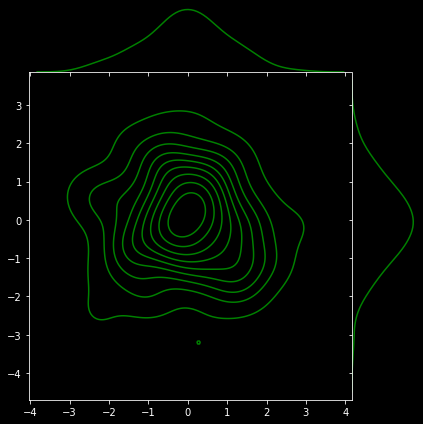

In [30]:
# Plot
x1 = samples[:, 0, 0, 2, 0]
x2 = samples[:, 0, 0, 2, 1]
sns.jointplot(x=x1, y=x2, kind="kde", space=0,
              color='g')